In [1]:
import pipeline as pipeline
print(pipeline.__file__)

/Users/Dev/AMD/dismod_mr_migrated/reforged_mr/model/spline.py
/Users/Dev/AMD/dismod_mr_migrated/reforged_mr/model/priors.py
/Users/Dev/AMD/dismod_mr_migrated/reforged_mr/model/age_groups.py
/Users/Dev/AMD/dismod_mr_migrated/reforged_mr/model/covariates.py
/Users/Dev/AMD/dismod_mr_migrated/reforged_mr/model/likelihood.py
/Users/Dev/AMD/dismod_mr_migrated/reforged_mr/pipeline.py


In [2]:
include_covariates = False
include_only_sex_covariate = False

In [3]:
input_dir  = './input_data'
stage_dirs = ['amd_sim_data', 'amd_sim_data_Early', 'amd_sim_data_Intermediate', 'amd_sim_data_Late-dry', 'amd_sim_data_Late-wet']
stage      = stage_dirs[2] # Intermediate

pm_model = pipeline.initiliaze_pipeline(f'{input_dir}/{stage}', verbose=True)

number of rows: 207
number of unique location_id: 18
number of nodes: 233
number of edges: 232


In [4]:
rate_types = ['beta_binom', 'binom', 'neg_binom', 'poisson', 'log_normal', 'normal', 'offset_log_normal']
rate_type = rate_types[2]

pipeline.generate_pymc_objects(pm_model, rate_type=rate_type, include_covariates=include_covariates, include_only_sex_covariate=include_only_sex_covariate)

Standard errors replaced: 0
Effective sample sizes filled: 0


In [5]:
map_estimate = pipeline.return_map_estimate(pm_model=pm_model, verbose=True)

INFO:pipeline:  ▶ pm.find_MAP() 수행 중...


In [6]:
idata = pipeline.return_idata(pm_model         = pm_model, 
                                map_estimate   = map_estimate, 
                                draws          = 2000,
                                tune           = 1000,
                                chains         = 4,
                                cores          = 4,
                                target_accept  = 0.9,
                                max_treedepth  = 10,
                                use_advi       = False,
                                use_metropolis = True,
                                verbose=True
                                ) 

INFO:pipeline:  ▶ Metropolis 샘플링 수행 중...
Multiprocess sampling (4 chains in 4 jobs)
INFO:pymc:Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
INFO:pymc:CompoundStep
>Metropolis: [gamma_p]
INFO:pymc:>Metropolis: [gamma_p]
>Metropolis: [eta_p]
INFO:pymc:>Metropolis: [eta_p]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 2 seconds.
INFO:pymc:Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 2 seconds.
INFO:pipeline:[asr] 전체 소요 시간: 6.1초


In [7]:
summary_df = pipeline.return_rhat(idata)

Total vars:    907
R-hat > 1.01:  0
R-hat <= 1.01:  851
R-hat missing: 56
<xarray.Dataset> Size: 14kB
Dimensions:               (knot: 6, age: 93, cum_sum_mu_p_dim_0: 93,
                           mu_interval_p_dim_0: 207, obs_dim: 207,
                           p_pred_p_dim_0: 207)
Coordinates:
  * knot                  (knot) float64 48B 2.0 30.0 45.0 60.0 80.0 94.0
  * age                   (age) float64 744B 2.0 3.0 4.0 5.0 ... 92.0 93.0 94.0
  * cum_sum_mu_p_dim_0    (cum_sum_mu_p_dim_0) int64 744B 0 1 2 3 ... 90 91 92
  * mu_interval_p_dim_0   (mu_interval_p_dim_0) int64 2kB 0 1 2 ... 204 205 206
  * obs_dim               (obs_dim) int64 2kB 0 1 2 3 4 ... 202 203 204 205 206
  * p_pred_p_dim_0        (p_pred_p_dim_0) int64 2kB 0 1 2 3 ... 203 204 205 206
Data variables:
    gamma_p               (knot) float64 48B 1.005 1.006 1.002 1.006 1.005 1.003
    eta_p                 float64 8B 1.001
    mu_age_p              (age) float64 744B 1.006 1.005 1.005 ... 1.003 1.003
    cons

/Users/Dev/AMD/dismod_mr_migrated/reforged_mr/pipeline.py:737: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hpd = pm.stats.hdi(pred, hdi_prob=0.95)


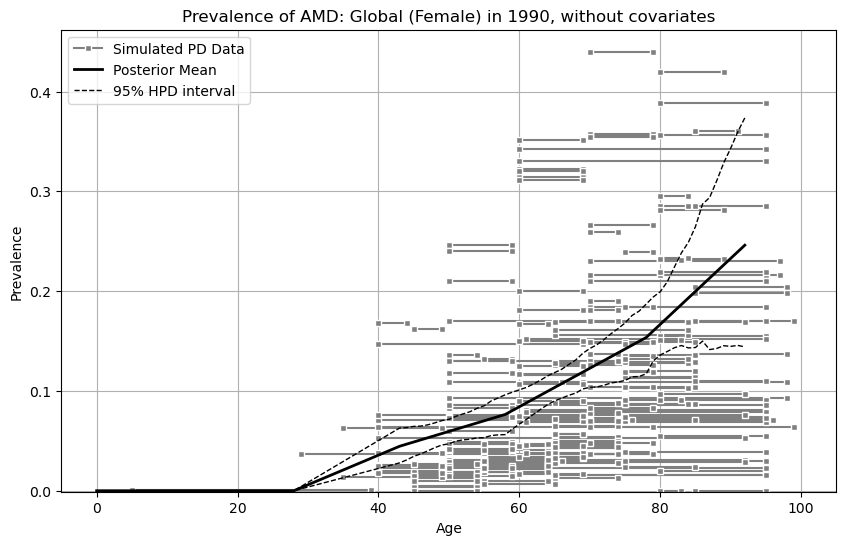

In [8]:
# Global: 1

# High-income Asia Pacific: 65
    # Brunei Darussalam: 66
    # Japan: 67
    # Republic of Korea: 68
    # Singapore: 69

# USA: 102

# Cambodia: 10
year = 1990
sex = 'Female'
location_id = 1

pred = pipeline.predict_for(pm_model                   = pm_model,
                            idata                      = idata, 
                            include_covariates         = include_covariates,
                            include_only_sex_covariate = include_only_sex_covariate,
                            lower                      = 0.0,
                            upper                      = 1.0,
                            year                       = year,
                            location_id                = location_id,
                            sex                        = sex
                            )

pipeline.visualize_pred(pred, pm_model.shared_data['data'], year, pm_model.shared_data['id_to_name'][location_id], sex, include_covariates, include_only_sex_covariate)

In [9]:
# Execute above cells